DSC630-T301 Predictive Analytics<br>
Course Project: Time Series<br>
Arash Mahmoudian<br>

# Introduction:
The second milestone of the Predictive Analytics course project which is due by the end of week two (03/26/23) is to select a main data set to work on throughout the course. Additionally, a secondary dataset will be introduced later in this paper in case the original plan did not work out as we expected. For this, the “Chicago Crime Rate” dataset driven from Kaggle is selected as the original one. The model will be evaluated using Residuals, RMSE, and P-RMSE metrics. Likewise, the “Car Accident” dataset driven from Kaggle is being selected as the contingency plan. Moreover, later in this paper, the original dataset descriptions are presented in detail and a brief overview of the contingency is provided.  Following, a general roadmap of the entire analysis process (broken down into several parts) is explained.

They can show where more resources are needed, as well as where fewer resources are needed as a community grows safer. Without statistics, it would be impossible to create appropriate law enforcement budgets. Beyond just budgets, crime statistics are important in broader law enforcement resource allocation. The findings of this study can be shared to the public for the public benfit.


### Dataset Description:
#### Chicago Crime Rate
This dataset contains a brief of the reported crimes that have taken place in the City of Chicago Illinois, US from 2001 to 2017. The dataset has been acquired from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. It comprises the following attributes:<br>
•	ID: Unique identifier for the record.<br>
•	Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.<br>
•	Date: Date when the incident occurred.<br>
•	Block: The address where the incident occurred.<br>
•	IUCR: The Illinois Uniform Crime Reporting code.<br>
•	Primary Type: The primary description of the IUCR code.<br>
•	Description: The secondary description of the IUCR code, a subcategory of the primary description.<br>
•	Location Description: Description of the location where the incident occurred.<br>
•	Arrest: Indicates whether an arrest was made.<br>
•	Domestic: Indicates whether the incident was domestic-related as defined by Illinois Domestic Violence Act.<br>
•	Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.<br>
•	District: Indicates the police district where the incident occurred.<br>
•	Ward: The ward (City Council district) where the incident occurred.<br>
•	Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas.<br>
•	FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).<br>
•	X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.<br>
•	Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.<br>
•	Year: The year of the incident.<br>
•	Updated On: Date and time the record was last updated.<br>
•	Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.<br>
•	Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.<br>
•	Location: The location where the incident occurred in a format that allows for the creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.<br><br>
The main goal is to predict the crime rate over time in the city of Chicago according to provided data as provided above. However, the focus of the study is mainly taking a time-series and make a time series prediction in future. 

This dataset is available in Kaggle via the following link:
https://www.kaggle.com/code/wafadje/predict-crime-rate-in-chicago



### RoadMap:

#### Data Preparation:
To build a model that can predict the crime rate in the future based on the available data for the last 5 years, a comprehensive data cleaning process is needed, once data is clean, exploratory data analysis will be performed to extract insights from the raw data. Having these insights in hand we make decisions on which Machine Learning Model is appropriate for performing predictive analytics.


#### Model Selection:
For this project, I will be using SARIMA time-series predictions as it has opted for both seasonality (crime rate might be correlated to the season) and autocorrelation. There are chances to change the model as I learn more about the data and different types of time-series predictive models. The below link provides further information on the different time-series models:
https://vitalflux.com/different-types-of-time-series-forecasting-models/


#### Model Evaluation:
The model will be evaluated using RMSE and P-RMSE metrics. RMSE is also called the Root Mean Square Deviation. It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions. In addition to RSME, P-RSME metric is also used to show percentage of RSME over the Mean of predicted values. When the difference between predicted and true labels are small the resulting prmse is between 0 and 100,  otherwise the PRSME will be greater than 100. The lower PRSME the better the model. The advantage of PRSME to RSME is it provide small number as compared to RSME and makes the result easy to understand.

<strong>PRSME = (RSME / MEAN())*100 </strong>


### Learning objectives:
Predictive Analytics is a process that can be broken down into different sections. All sections are important, and each section can have a huge effect on the accuracy of the result. Therefore, the following are the learning objectives for each section.

•	Define Project: How to identify a project’s goals and expectations.
•	Data Collection: Data collection methods to reduce the possible error rate.
•	Data Analysis: Python visualization libraries (Matplotlib & Seaborn) and other functions.
•	Statistics: How to interpret the statistical result/concepts and make decisions based on them.
•	Modeling: The differences between predictive models and their use cases.
•	Deployment: Error handling.

### Risks or Ethical Concerns:
There are some possible risk factors (privacy rights, data validity, and algorithm fairness in the areas of Big Data, AI, and ML) that predictive analytics can cause especially if the result is published to a broader audience in public. Extra effort is needed to make sure there is no private information leakage. Next, before any data analytics, we need to make sure the data is valid and is not contaminated. Later, to achieve an accurate prediction, we need to ensure that we have enough data to draw a conclusion and extrapolate it into a broader population.



### Contingency Plan

In case the original project did not work out, I will be working on the second dataset called “Car Accident”. This dataset is available in Kaggle and covers 4 million cases of traffic accidents that took place from Feb 2016 to Dec 2020 in 49 states of the US, each case with 49 different attributes. In general, the shape of data is: (Rows: 4232541, Columns: 49). 
In the end, the main goal is to predict the severity of the accidents according to the cases and 
their description. 

This dataset is available on Kaggle via the below link:
https://www.kaggle.com/code/jingzongwang/usa-car-accidents-severity-prediction/notebook





## Load Libraries

In [1]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, date, timedelta, time
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
%%time
df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv' , on_bad_lines='skip')
print(df.shape)
df.columns

(1456714, 23)
Wall time: 8.16 s


Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [3]:
%%time
#Convert string Date to Datetime.Date type
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()


# District, Wars, and Community Are are categorical attributes, therefore nulls can be replaced with 0
df[['District','Ward','Community Area']] = df[['District','Ward','Community Area']].fillna(0)
df[['District','Ward','Community Area']] = df[['District','Ward','Community Area']].astype(int)

# Block is holding the address, which in our case we don't need it
df.drop(columns =['Block'], inplace=True)

Wall time: 1min 16s


# Data Exploration


The Chicago crime dataset for a period starting from Jan 2012 to Jan 2017 is being selected to apply the SARIMA model to it. The dataset consists of 1456714 records and 23 features. The data is stored in a daily resolution; therefore the incidents are distributed in 1828 on different dates. Because of the nature of the SARIMA model which only takes two attributes at a time (index and value) a new dataset has been created from the original one by daily grouping the incident counts. This creates a new dataset of 2 columns and 1828 rows.


Will I be able to answer the questions I want to answer with the data I have?

The newly created dataset holds the required data for all days between JAN 2012 to JAN 2017. Thus, the dataset with good confidence enables us to perform the model on it. 

What visualizations are especially useful for explaining my data?

The original dataset comes with some more descriptive features not only showing when the crimes happened but also showing how and where they took place. These features are categorical and can be used to extract the correlation between the crime type and their respective location and time. To begin with, some count bar plots have been provided for some features (Primary Type, Beats, District, Ward, Location Description, and Community Area) with their respective contribution. Later a correlation matrix will be generated to find the possible correlation between these categorical features. Furthermore, as the dataset type is time series, trends over time need to be illustrated so that stationarity and seasonality can be depicted.

 ### Primary Type
 The primary description of the IUCR code.
 Theft stands at the first step with a contribution of %22.6 of all types. Second is Battery %18.1 and thirs is Criminal Damge with %10.7

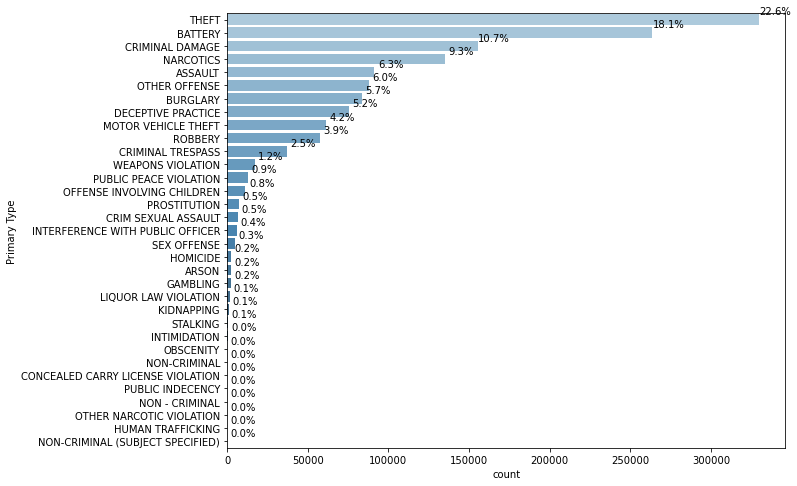

Wall time: 1.63 s


In [4]:
%%time
#sns.color_palette("tab10")
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, y='Primary Type', order=df['Primary Type'].value_counts(ascending=False).index,  palette="Blues_d")
total = sum(df['Primary Type'].value_counts())
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 10000
    y = p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Beat: 
 Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.
 
The contribution for all beats are less than %0.8. This values is less than %0.5 for most of beats.

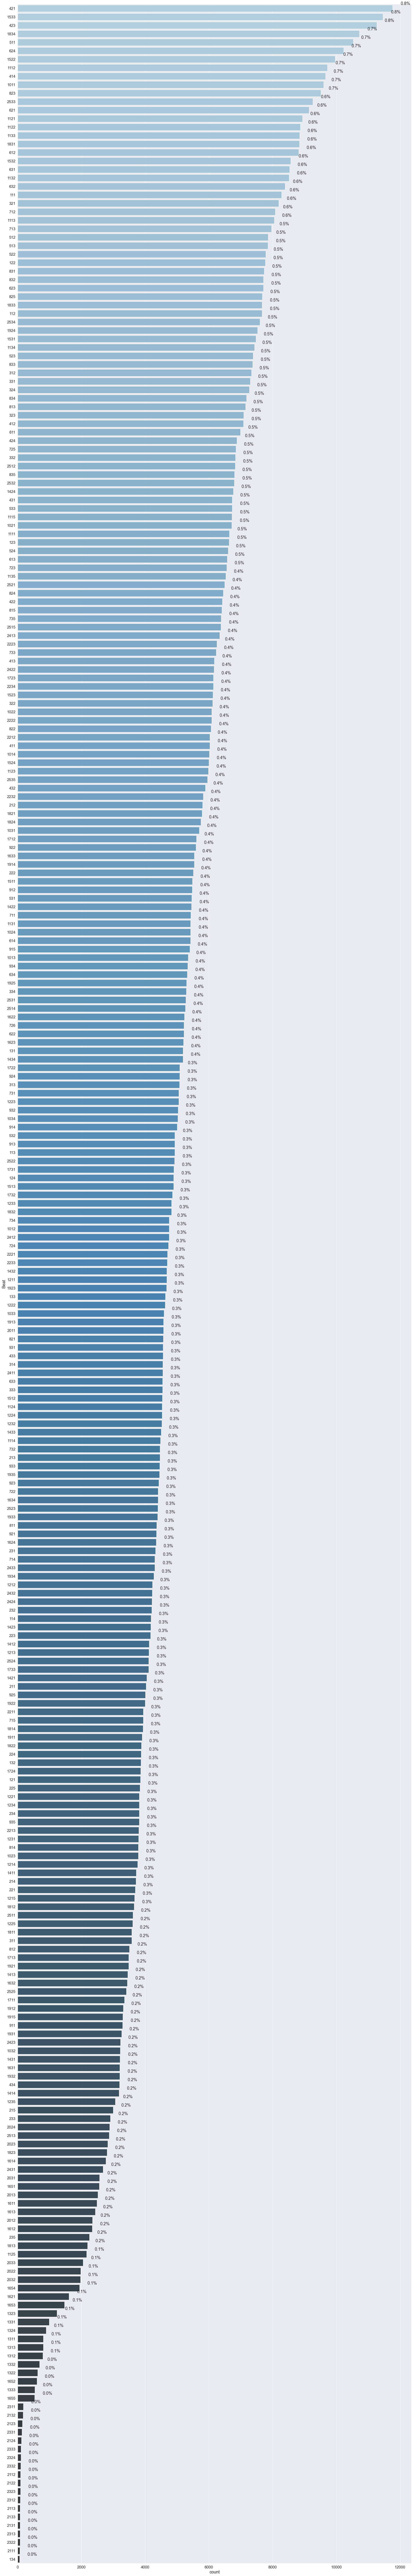

Wall time: 6.18 s


In [5]:
%%time
plt.figure(figsize=(30,200))
sns.set(font_scale=1.5)
ax = sns.countplot(data=df, y='Beat', order=df['Beat'].value_counts(ascending=False).index,  palette="Blues_d")
total = sum(df['Beat'].value_counts())
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 400
    y = p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### District 
Indicates the police district where the incident occurred.

This plot below shows crimes distribution between different districts. Districts 11, 8 and 6 are the top 3 districts where most crims took place.

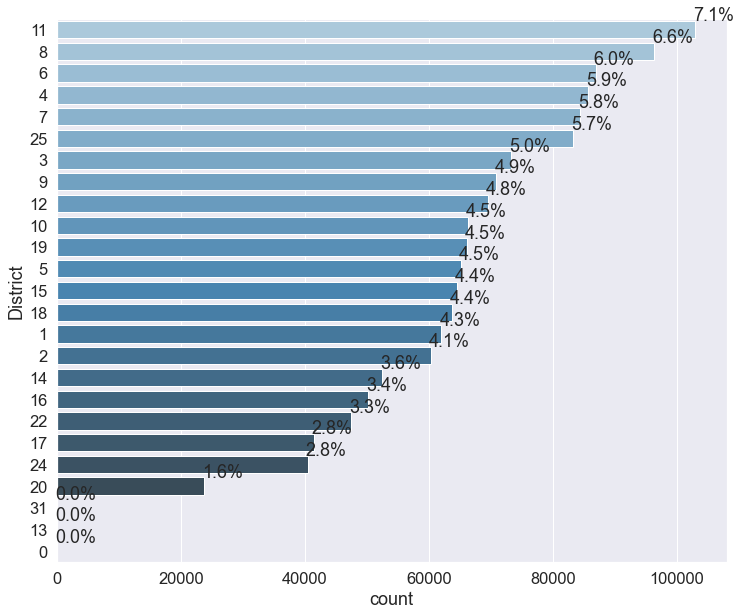

Wall time: 664 ms


In [6]:
%%time
plt.figure(figsize=(12,10))
#sns.set(font_scale=1)
ax = sns.countplot(data=df, y='District', order=df['District'].value_counts(ascending=False).index,  palette="Blues_d")
total = sum(df['District'].value_counts())
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3000
    y = p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Ward
The ward (City Council district) where the incident occurred.
This plot below shows crimes distribution between different wards. Wards 28, 42 and 24 are the top 3 wards where most crims took place.

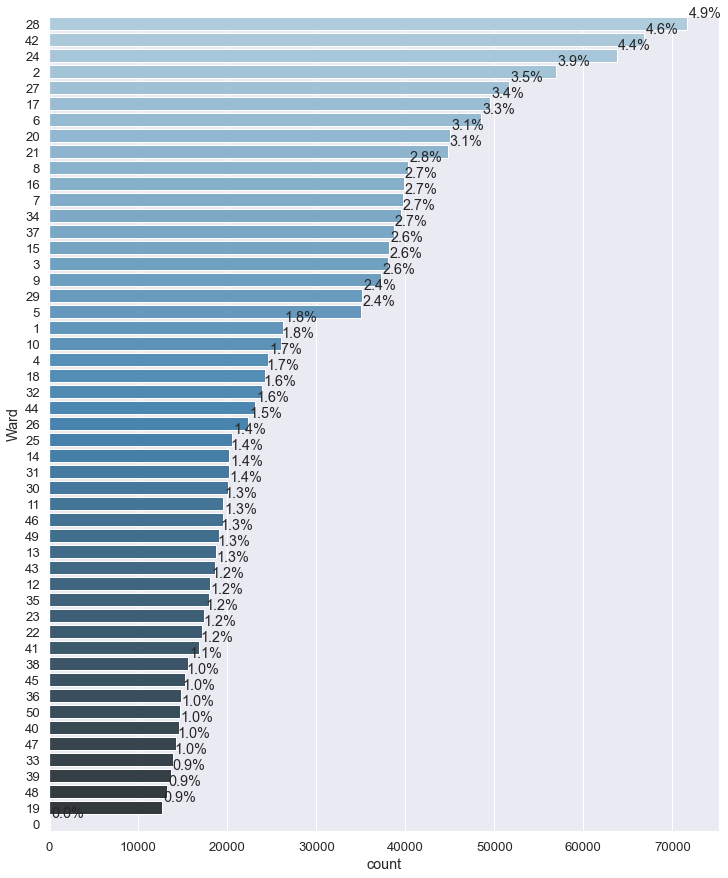

Wall time: 1.29 s


In [7]:
%%time
plt.figure(figsize=(12,15))
sns.set(font_scale=1.2)
ax = sns.countplot(data=df, y='Ward', order=df['Ward'].value_counts(ascending=False).index,  palette="Blues_d")
total = sum(df['Ward'].value_counts())
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() +2000
    y = p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Location Description

Description of the location where the incident occurred.</br>
Street: %22.7</br>
Residence: %16.7</br>
Apartment: %12.7</br>
Sidewalk: %11.1</br>


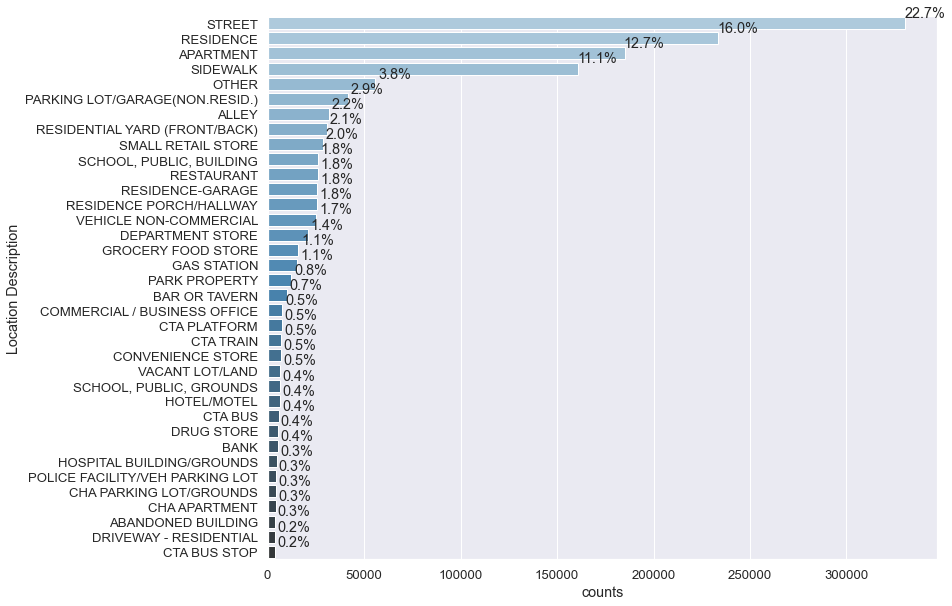

Wall time: 857 ms


In [8]:
%%time
df_ld = pd.DataFrame(df['Location Description'].value_counts(ascending=False))
df_ld.reset_index(inplace = True)
df_ld.rename(columns ={"index":"Location Description", "Location Description":"counts"}, inplace = True)
df_ld_sum = df_ld['counts'].sum()

df_ld['pct%'] = None
df_ld['pointer']= None
comulative_pct = 0
comulative_pct_max = 96

for index, row in df_ld.iterrows():
    cnt = row['counts']
    pct = cnt/df_ld_sum*100
    df_ld.iat[index, 2] = pct
    
    comulative_pct += pct
    if(comulative_pct <= comulative_pct_max):
        df_ld.iat[index, 3] = 1
    else:
        df_ld.iat[index, 3] = 0
        
    
    
df_ld1 = df_ld[df_ld['pointer'] == 1]
plt.figure(figsize=(12,10))
ax = sns.barplot(x=df_ld1.counts, y=df_ld1['Location Description'], orient='h', palette="Blues_d")

total = df_ld_sum
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 10000
    y = p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Community Area: 
Indicates the community area where the incident occurred. Chicago has 77 community areas.

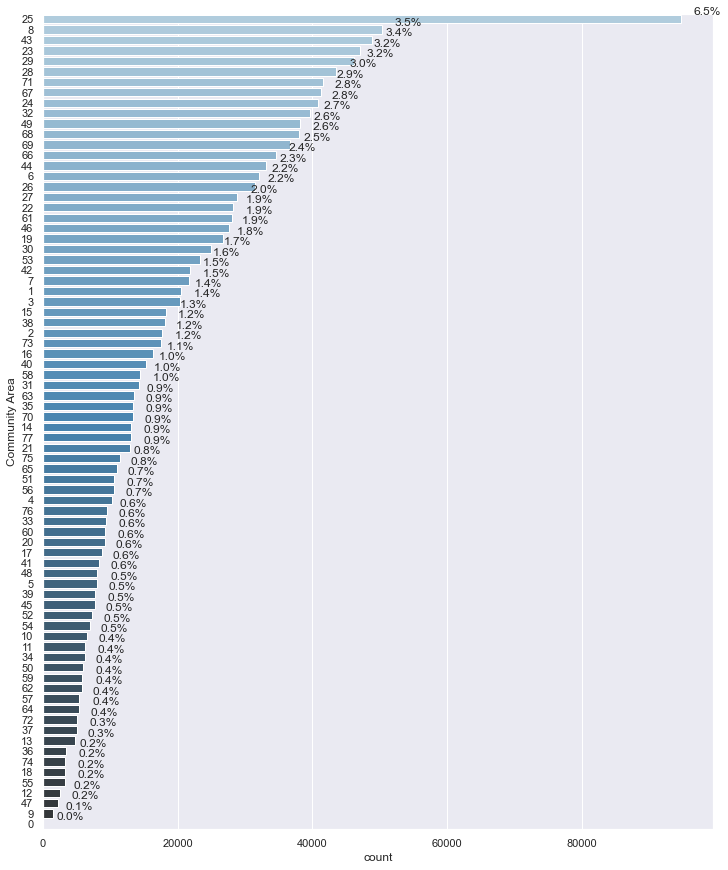

Wall time: 1.66 s


In [9]:
%%time
plt.figure(figsize=(12,15))
sns.set(font_scale=1)
ax = sns.countplot(data=df, y='Community Area', order=df['Community Area'].value_counts(ascending=False).index,  palette=("Blues_d"))
total = sum(df['Community Area'].value_counts())
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() +4000
    y = p.get_y()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Implementation:

Do I need to adjust the data and/or driving questions?

The SARIMA model is running slow especially when applying a seasonal period of six-year days. Therefore, instead of standard data splitting (training: %80, test: %20), the data have been sliced into training: %96.6 and test:  %3.4 to overcome the time and memory constraints. However, this slicing only enables us to predict the crime counts for limited points in the future in this case the test dataset for the last two months (61 points/days). 

(MemoryError: Unable to allocate 1.77 GiB for an array with shape (367, 367, 1768) and data type float64)

The SARMA model order definition is challenging and needs a powerful processor to examine various orders and discover the one that has a high predictive power. To minimize the processing time auto_arima model from pmdarima package is used to find the right orders. Additionally, a complementary rolling forecast method is used which takes predictions one point ahead and uses it as a training observation to predict the next one. This helps to increase accuracy in the cost of time and processing power. Comperatively rolling forecast approach provides predictions near to reality, however this method is approriate for a short future priod as it take long time to re-train the model for every single prediction it makes.

In case prediction for a long future prtiod is needed an alternative solution is to group the crime counts on a weekly basis and reduce the resolution from 1828 to 265 points. Then we can perform the prediction for 53 future weeks which is an acceptable resolution for the year. This helps us to make predictions for the next two years on a weekly resolution much faster. It is also worth mentioning that the auto_arima suggestion was not accurate enough. Therefore, we picked the orders after multiple tries and errors.

Moving forward Residuals, RMSE, and PRMSE metrics are used to evaluate the model accuracy.
Additionally, Facebook prophet model is suggested be used to compare the result between SARIMA and Prophet models.


## Building a Time Series Model

### Grouping incident counts based on date 

In [10]:
%%time
df_dt = pd.DataFrame(df.groupby(['Date'])['ID'].count())
#df_dt_grp.reset_index(inplace = True)
df_dt.rename(columns ={"ID":"Counts"}, inplace = True)
df_dt = df_dt.asfreq(pd.infer_freq(df_dt.index))
print(df_dt.shape)
df_dt.head(2)

(1845, 1)
Wall time: 85 ms


,Counts
Date,
2012-01-01,1451
2012-01-02,700


In [11]:
%%time
start_date = date(2012,1,1)
end_date = date(2017,1,1)
lim_df = df_dt[start_date: end_date]

Wall time: 4.08 ms


Wall time: 175 ms


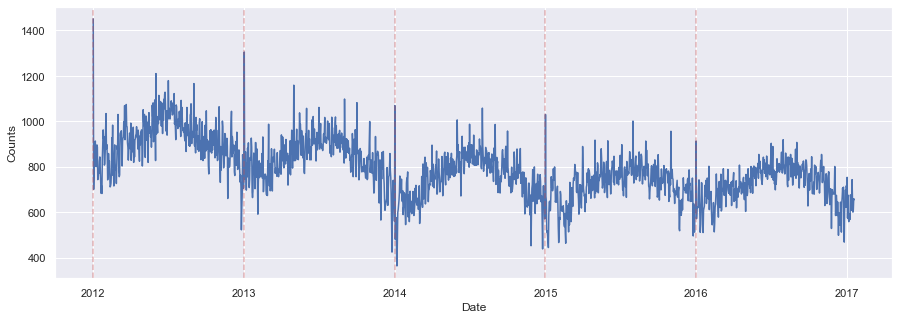

In [12]:
%%time
plt.figure(figsize = (15,5))
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1)
sns.lineplot(x = df_dt.index, y = "Counts", data = df_dt)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color = 'r', linestyle='--', alpha = 0.4)

From graph it can be seen that the trend is not-stationary as it is declining over the time. It also shows seasonality pattern over the time.

### Stationary Check

As it can be seen from the trend, the changes are non-stationary. 
ARIMA models can handle cases where the non-stationarity is due to a unit-root but may not work well at all when non-stationarity is of another form. Following <strong>Augmented Dickey-Fuller</strong> test shows that non-stationary is due to unit-root type and implies that ARIMA is not an appropriate model for this data.



Ref: https://machinelearningmastery.com/time-series-data-stationary-python/
Augmented Dickey-Fuller test

In [13]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [14]:
check_stationarity(df_dt['Counts'])

ADF Statistic: -1.901301
p-value: 0.331449
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Non-stationary


### Remove Trend
To calculate the ACF and PACF we need to eliminate the seasonality and convert the trend to stationary. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) The ACF and PACF are used to figure out the order of AR, MA, and ARMA models.

The ACF plot can provide answers to the following questions:<br>
* Is the observed time series white noise/random?
* Is an observation related to an adjacent observation, an observation twice-removed, and so on?
* Can the observed time series be modeled with an MA model? If yes, what is the order?

The PACF plot can provide answers to the following question:
* Can the observed time series be modeled with an AR model? If yes, what is the order?


<table>
  <tr>
    <th>Test</th>
    <th>AR(p)</th>
    <th>MA(q)</th>
    <th>ARMA(p,q)</th>
  </tr>
  <tr>
    <td>ACF</td>
    <td>Tails off (Geometry decay)</td>
    <td>Significant at lag q/ Cutts off after lag q</td>
    <td>Tails off (Geometry decay</td>
  </tr>
  <tr>
      <td>PACF</td>  
    <td>Significant at lag q/ Cutts off after lag q</td>
    <td>Tails off (Geometry decay)</td>
    <td>Tails off (Geometry decay)</td>
  </tr>
</table>



https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c


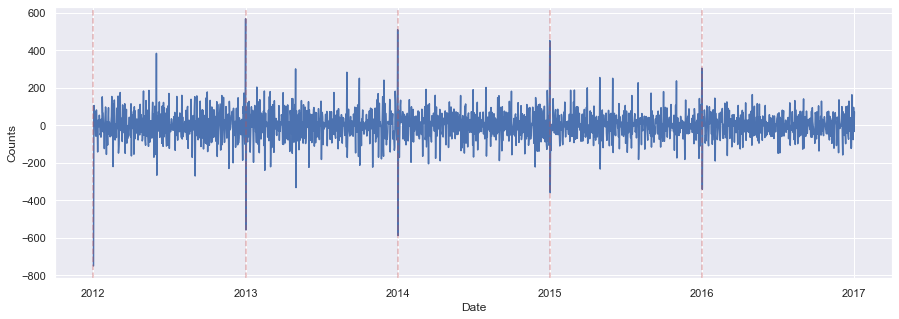

In [15]:
# arraye of 1 lag difference


first_dif = lim_df.diff()[1:]

plt.figure(figsize=(15,5))
sns.lineplot(x = first_dif.index, y = "Counts", data = first_dif)
for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color = 'r', linestyle='--', alpha = 0.4)

In [16]:
check_stationarity(first_dif)

ADF Statistic: -11.623603
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


### ACF

Any lag magnititude within the confidence level are considered as a noise. Later, Strong correlation is being observed with first lag, also every 7 lags there is a pattern. ACF starts with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

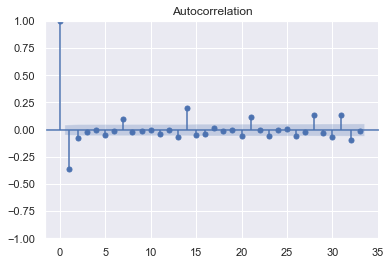

In [17]:
# There are several autocorrelations that are significantly non-zero. Therefore, the time series is non-random.
# High degree of autocorrelation between adjacent (lag = 1) in PACF plot
# Geometric decay in ACF plot
# Each lag 7 shows weekly correlation

acf = plot_acf(first_dif, lags = 33, alpha=0.05)

### PACF

Any lag magnititude within the confidence level are considered as a noise. Strong direct correlation with 2nd, 3rd, and 4th lags can be observed.

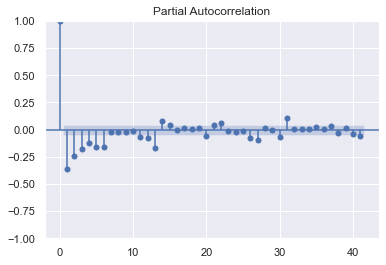

In [18]:
pacf = plot_pacf(first_dif, lags = 41, alpha=0.05)

ARIMA: (AR, I, MA)
Studying ACF and PACF we can conclude that 

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.


* Autoregression can be set to one as there is a strong relation between first lag, This will remove any autocorrelation   pattern
* Integrated portion can be set to 1 to be able to convert the trend to a stationary one. 
* A s the lags are dropping exponentially Moving Average (MA) can also be set to non-zero 

### FIT THE SARIMA MODEL

SARIMA model is running slow as we have more data points. For this instead of splitting date with a portion of 80/20 for training and test. 
p-values are are less than 0.05 which shows that model we have selected is appropriate

In [19]:
%%time
first_date = datetime(2012,1,1)
train_end = datetime(2016,11,1)
test_end = datetime(2017,1,1)

temp_lim_df = lim_df[:test_end]
train_data = lim_df[:train_end]
test_data =  lim_df[train_end + timedelta(days=1):test_end]
print(train_data.shape, test_data.shape)

(1767, 1) (61, 1)
Wall time: 2.18 ms


In [20]:
%%time
auto_arima_model = auto_arima(train_data, seasonal=False, stepwise=False, supress_warnings=True)
print(auto_arima_model.summary())
print(auto_arima_model)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1767
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -9990.987
Date:                Fri, 02 Jun 2023   AIC                          19989.975
Time:                        02:42:00   BIC                          20011.881
Sample:                    01-01-2012   HQIC                         19998.069
                         - 11-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0540      0.164     -0.329      0.742      -0.375       0.267
ar.L1          0.2404      0.019     12.758      0.000       0.203       0.277
ma.L1         -0.9071      0.011    -83.887      0.0


p-value interpretation:
intercept: 0.742 is not significant and is uninformative, not reported (significantly different from zero or not) and (to add caution to Shuichi's advice) not constrained. In general, it has no impact on the final result.Additionally, ar.l1 and ma.l2 are significant and model is aligned with the assumptions.

SARIMA(p,d,q)(P, D, Q)m p- auto-regressive, d- differencing, q- moving average, m- number of periods in season, (P, D, Q) - (p,d,q) for the seasonal part of the time series

In [21]:
my_order = (1,1,1)
my_seasonal_order = (0,0,0, 61)
model = SARIMAX(train_data, order= my_order, seasonal_order= my_seasonal_order)

In [22]:
%%time
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Counts   No. Observations:                 1767
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -9991.049
Date:                Fri, 02 Jun 2023   AIC                          19988.097
Time:                        02:42:01   BIC                          20004.527
Sample:                    01-01-2012   HQIC                         19994.168
                         - 11-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2403      0.019     12.915      0.000       0.204       0.277
ma.L1         -0.9070      0.011    -86.196      0.000      -0.928      -0.886
sigma2      4802.3634     83.054     57.822      0.0

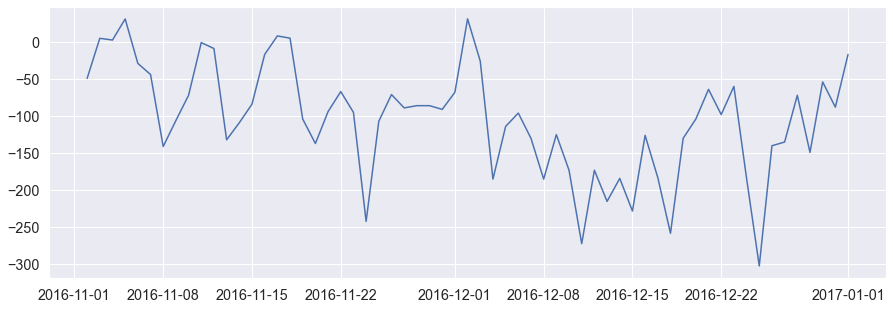

In [23]:
pred = model_fit.forecast(61)
pred = pd.Series(pred, index=test_data.index)
residuals = test_data.Counts - pred


sns.set(font_scale = 1.3)
plt.figure(figsize=(15,5))
plt.plot(residuals)

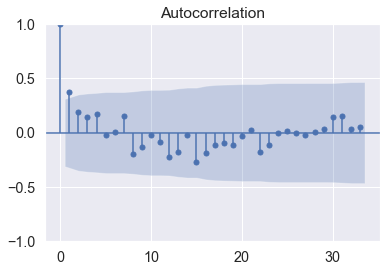

In [24]:
residual_series = residuals[residuals.index > '2016-11-22']
acf = plot_acf(residual_series, lags = 33, alpha=0.05)


ACF: There are also “strict” white noise distributions these have strictly 0 serial correlation. The model generates <strong>white noise</strong> like residuals after 2016-11-22.

A time series is white noise if the variables are independent and identically distributed with a mean of zero. This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.

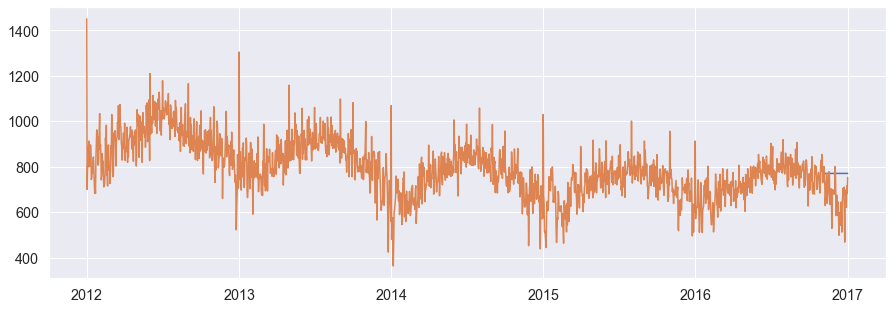

In [25]:
plt.figure(figsize=(15,5))
plt.plot(pred)
plt.plot(lim_df)

Clearly the forecasted values are not following the trend pattern

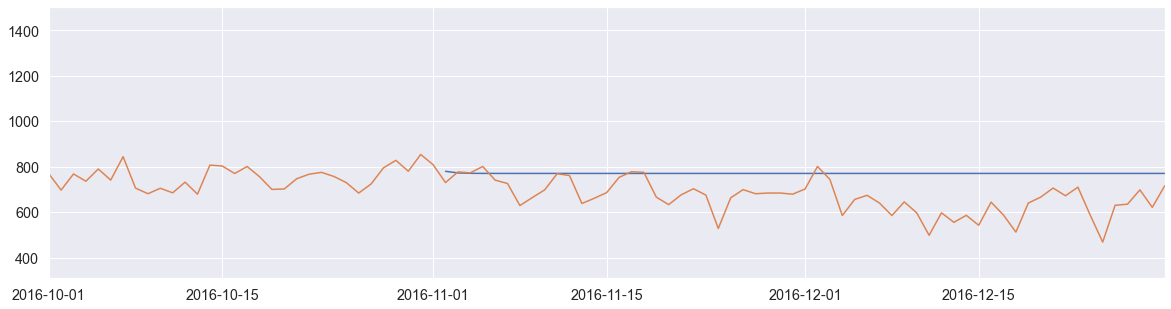

In [26]:
plt.figure(figsize=(20,5))
plt.xlim(date(2016,10,1),date(2016,12,30))
plt.plot(pred)
plt.plot(lim_df)

Zooming in the forecast period, we can see that the forecasted values are approximately same value.

#### Model Evaluation

In [27]:
max_val = test_data['Counts'].max()
mean_val = test_data['Counts'].mean()

forecast_mean_val = pred.mean()
forecast_max_val = pred.max()

rmse = mean_squared_error(test_data['Counts'], pred)
p_rmse = (rmse / mean_val)*100

mean_pct = (forecast_mean_val - mean_val)*100/mean_val

print(f'Test MEAN: {mean_val}')
print(f'Test MAX: {max_val}')
print(f'RMSE: {rmse}')
print(f'P-RMSE: {p_rmse}')
print(f'Forecast MEAN: {forecast_mean_val}')
print(f'Forecast MAX: {forecast_max_val}')
print(f'Mean diff : {round(mean_pct,2)}')

Test MEAN: 666.6229508196722
Test MAX: 801
RMSE: 16389.151776950617
P-RMSE: 2458.533981885667
Forecast MEAN: 770.5891788975521
Forecast MAX: 779.6685506373699
Mean diff : 15.6


There is a <strong> %15.6 </strong>distance in the mean value of test (666) and forecasted datasets(770).

### Rolling Forecast Origin

In [28]:
%%time
rolling_pred = test_data['Counts'].copy()
for train_end in test_data.index:
    train_data = lim_df[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order= my_order, seasonal_order= my_seasonal_order)
    model_fit = model.fit()
    
    pred = model_fit.forecast(1)
    rolling_pred.at[train_end] = pred
    print(train_end, end='\r')
    
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Counts   No. Observations:                 1827
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -10326.062
Date:                Fri, 02 Jun 2023   AIC                          20658.123
Time:                        02:42:15   BIC                          20674.653
Sample:                    01-01-2012   HQIC                         20664.221
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2440      0.019     13.179      0.000       0.208       0.280
ma.L1         -0.9052      0.011    -85.521      0.000      -0.926      -0.884
sigma2      4779.0283     81.580     58.581      0.0

p-values are zero meaning that model orders are selected appropriately. 

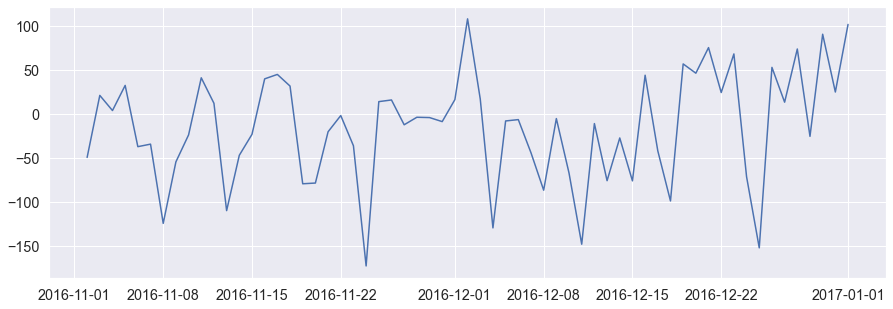

In [29]:
rolling_residuals = test_data['Counts'] - rolling_pred
plt.figure(figsize=(15,5))
plt.plot(rolling_residuals)

As comapred to the first method, the residuals in rolling forecast method are closed to zero.

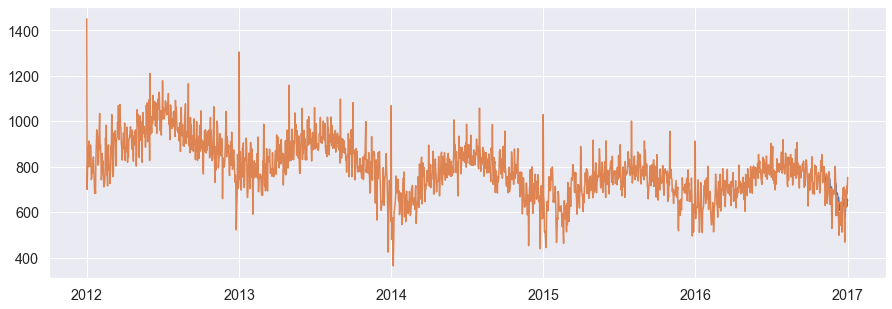

In [30]:
plt.figure(figsize=(15,5))
plt.plot(rolling_pred)
plt.plot(lim_df, )

Predicted values are too close to the original values where it is hard to determine the blue line.

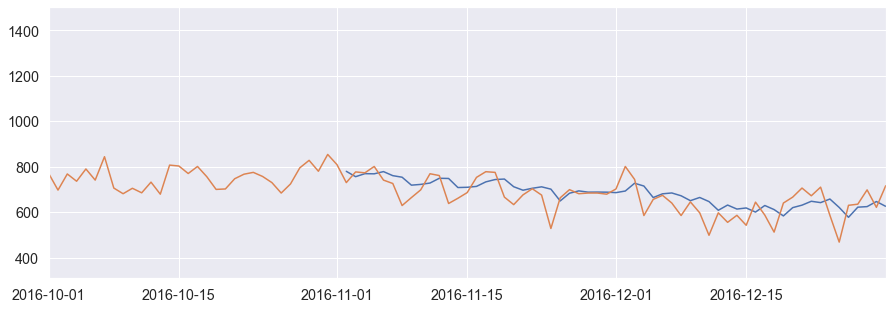

In [31]:
plt.figure(figsize=(15,5))
plt.xlim(date(2016,10,1),date(2016,12,30))
plt.plot(rolling_pred)
plt.plot(lim_df)

Compared to the conventianl mothod we can see the prediction is almost close to the original values.

#### Model Evaluation

In [32]:
mean_vale = test_data['Counts'].mean()
max_val = test_data['Counts'].max()

forecast_mean_val = rolling_pred.mean()
forecast_max_val = rolling_pred.max()

rmse = mean_squared_error(test_data['Counts'], rolling_pred)
p_rmse = (rmse / mean_vale)*100

print(f'Test MEAN: {mean_val}')
print(f'Test MAX: {max_val}')
print(f'RMSE: {rmse}')
print(f'P-RMSE: {p_rmse}')
print(f'Forecast MEAN: {forecast_mean_val}')
print(f'Forecast MAX: {forecast_max_val}')

Test MEAN: 666.6229508196722
Test MAX: 801
RMSE: 4202.011311599525
P-RMSE: 630.3430307091554
Forecast MEAN: 681.9922983057211
Forecast MAX: 779.6685506373699


There is a <strong>%2.25</strong> distance in the mean value of test and forecasted datasets.

### Weekly prediction

In [33]:
df.shape
df1 = df.copy()

In [34]:
# reset index to overall week number
df1['w_no'] = [x.week for x in df1['Date']]
lim_df1 =pd.DataFrame(df1.groupby(['Year','w_no'])['ID'].count())
lim_df1.columns = ['Counts']
lim_df1 = lim_df1.sort_index()
lim_df1 = lim_df1.reset_index()
lim_df1 = lim_df1.drop(columns=['Year','w_no'])
print(lim_df1.shape)
lim_df1.head(3)

(266, 1)


,Counts
0,6485
1,5709
2,5287


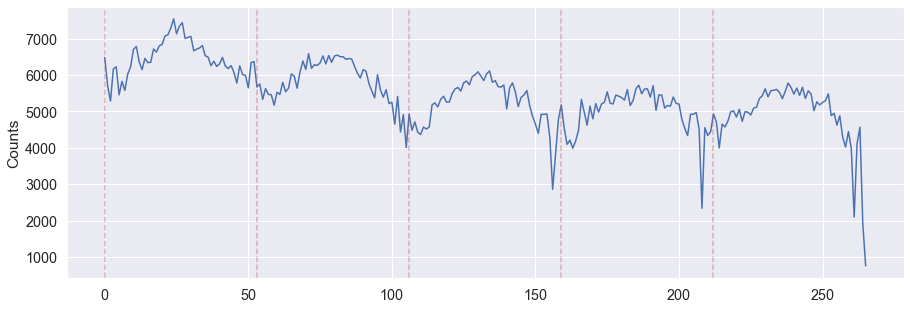

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(x = lim_df1.index, y = "Counts", data = lim_df1)

for i in range(0, 255):
    if(i%53) == 0:
        plt.axvline(i, color = 'r', linestyle='--', alpha = 0.4)

The trend is not-stationary and seasonality can be observed

### Remove Trend
To calculate the ACF and PACF we need to eliminate the seasonality and convert the trend to stationary.

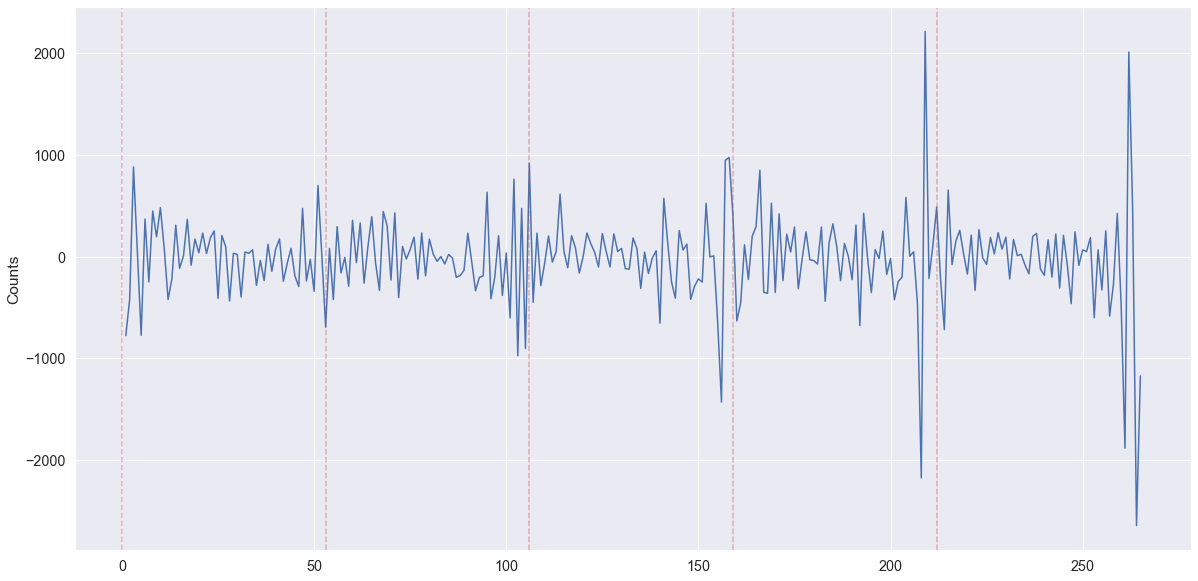

In [36]:
first_dif1 = lim_df1.diff()[1:]

plt.figure(figsize=(20,10))
sns.lineplot(x = first_dif1.index, y = "Counts", data = first_dif1)
for i in range(0, 255):
    if(i%53) == 0:
        plt.axvline(i, color = 'r', linestyle='--', alpha = 0.4)

In [37]:
# # split test and train
df_train = lim_df1[:212] # %80  0-212
df_test = lim_df1[212:]  # %20  212-263

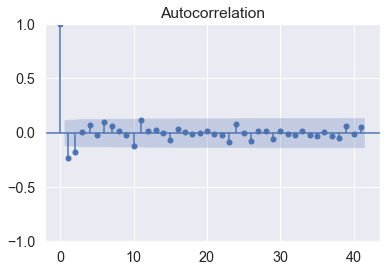

In [38]:
# acf_vals = acf(first_dif1['Counts'])
# num_lags = 25
# plt.figure(figsize=(15,5))
# plt.bar(range(num_lags), acf_vals[: num_lags])
acf = plot_acf(first_dif1['Counts'], lags = 41, alpha=0.05)

Any lag magnititude within the confidence level are considered as a noise. Later, Strong correlation is being observed with first and second lags.
Based on ACF, we should start with a seasonal MA process.</br>


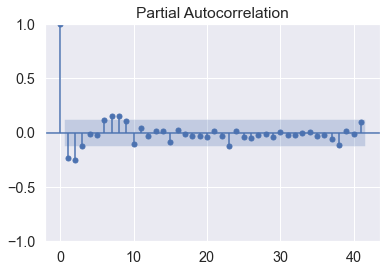

In [39]:
# pacf_vals = pacf(first_dif1['Counts'])
# num_lags = 25
# plt.figure(figsize=(15,5))
# plt.bar(range(num_lags), pacf_vals[: num_lags])

pacf = plot_pacf(first_dif1['Counts'], lags = 41, alpha=0.05)

Any lag magnititude within the confidence level are considered as a noise. Later, strong direct correlation with first and second lags can be observed. Based on ACF, we should start with a seasonal AR process.

ARIMA: (AR, I, MA) Studying ACF and PACF we can conclude that

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.

* Autoregression can be set to one as there is a strong relation between first lag, This will remove any autocorrelation pattern
* Integrated portion can be set to 1 to be able to convert the trend to a stationary one.
* Moving Average can also be set to 1 as the lags are dropping exponentially

In [40]:
# fit model
model = SARIMAX(df_train['Counts'], order = (1, 1, 2), seasonal_order = (1, 0, 1, 52), 
                enforce_stationarity=False, enforce_invertibility=False)

model_fit = model.fit(disp=False)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               Counts   No. Observations:                  212
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 52)   Log Likelihood               -1122.888
Date:                              Fri, 02 Jun 2023   AIC                           2257.776
Time:                                      02:42:24   BIC                           2276.075
Sample:                                           0   HQIC                          2265.208
                                              - 212                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5551      0.655     -0.848      0.397      -1.838       0.728
ma.L1         -0.09

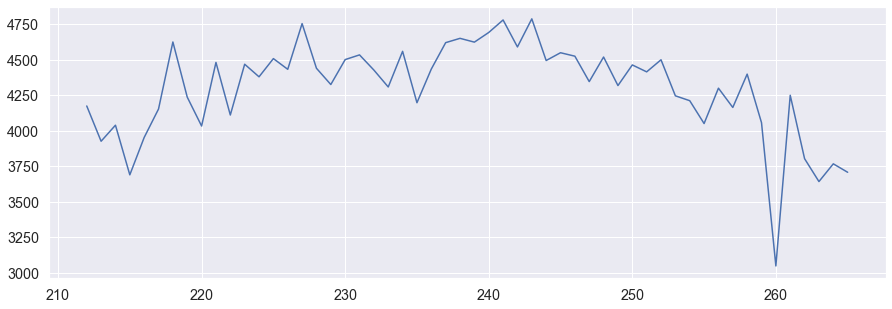

In [41]:
pred = model_fit.forecast(54)
pred = pd.Series(pred, index=df_test.index)
residuals = test_data = pred


sns.set(font_scale = 1.3)
plt.figure(figsize=(15,5))
plt.plot(residuals)

Large Residuals are generated

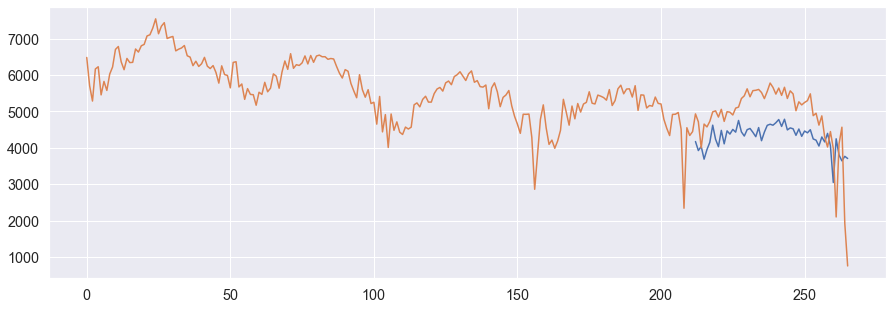

In [42]:
plt.figure(figsize=(15,5))
plt.plot(pred)
plt.plot(lim_df1)

Residuals vs Actual values shows there is a bug differences between them However, their pattern looks similar

#### Model Evaluation

In [43]:
mean_val = df_test['Counts'].mean()
max_val = df_test['Counts'].max()

forecast_mean_val = pred.mean()
forecast_max_val = pred.max()

rmse = mean_squared_error(df_test['Counts'], pred)
p_rmse = (rmse / mean_val)*100

print(f'Test MEAN: {mean_val}')
print(f'Test MAX: {max_val}')
print(f'RMSE: {rmse}')
print(f'P-RMSE: {p_rmse}')
print(f'Forecast MEAN: {forecast_mean_val}')
print(f'Forecast MAX: {forecast_max_val}')

Test MEAN: 4879.222222222223
Test MAX: 5782
RMSE: 935695.5383321171
P-RMSE: 19177.14536695068
Forecast MEAN: 4299.400829396017
Forecast MAX: 4786.538115780552


There is a <strong>%11.8</strong> distance in the mean value of test and forecasted datasets.

### Rolling Forecast Origin

In [44]:
model_order = (1, 1, 2)
model_seasonal_order = (1, 0, 1, 52)

In [45]:
%%time
rolling_pred = df_test['Counts'].copy()
for train_end in df_test.index:
    df_train = lim_df1[:train_end]
   
    model = SARIMAX(df_train['Counts'], order = model_order, seasonal_order = model_seasonal_order, 
                enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    
    pred = model_fit.forecast()
    rolling_pred[train_end] = pred
    print(train_end, end='\r')
    
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               Counts   No. Observations:                  265
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 52)   Log Likelihood               -1549.109
Date:                              Fri, 02 Jun 2023   AIC                           3110.217
Time:                                      02:47:15   BIC                           3130.271
Sample:                                           0   HQIC                          3118.325
                                              - 265                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7143      0.391     -1.826      0.068      -1.481       0.052
ma.L1          0.08

In [46]:
mean_val = df_test['Counts'].mean()
max_val = df_test['Counts'].max()

forecast_mean_val = rolling_pred.mean()
forecast_max_val = rolling_pred.max()

rmse = mean_squared_error(df_test['Counts'], rolling_pred)
p_rmse = (rmse / mean_val)*100

print(f'Test MEAN: {mean_val}')
print(f'Test MAX: {max_val}')
print(f'RMSE: {rmse}')
print(f'P-RMSE: {p_rmse}')
print(f'Forecast MEAN: {forecast_mean_val}')
print(f'Forecast MAX: {forecast_max_val}')

Test MEAN: 4879.222222222223
Test MAX: 5782
RMSE: 442047.3333333333
P-RMSE: 9059.790950288068
Forecast MEAN: 4962.62962962963
Forecast MAX: 5702


There is a <strong>%1.7</strong> distance in the mean value of test and forecasted datasets.

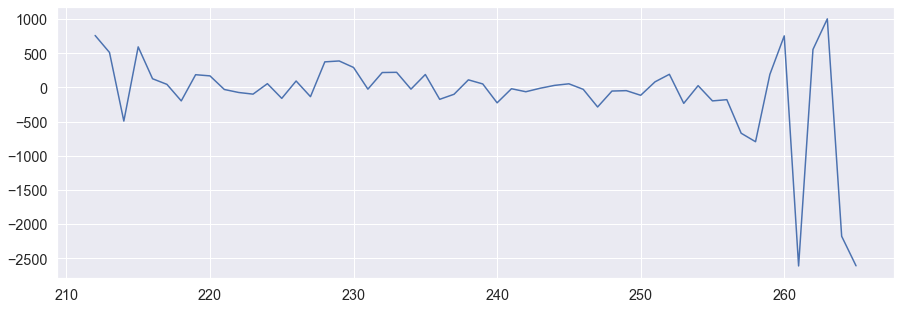

In [47]:
rolling_residuals = df_test['Counts'] - rolling_pred
plt.figure(figsize=(15,5))
plt.plot(rolling_residuals)

Residuals are approximately approaching to zero.

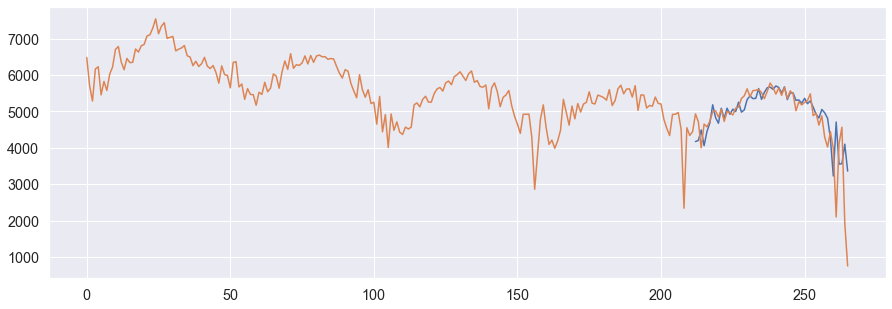

In [48]:
plt.figure(figsize=(15,5))
plt.plot(rolling_pred)
plt.plot(lim_df1)

Compared to the conventianl mothod we can see the prediction is almost close to the original values.

## Forecast next two Yeasr using Rolling Method

In [49]:
%%time
model_order = (1, 1, 2)
model_seasonal_order = (1, 0, 1, 53)

rolling_pred = pd.DataFrame([0 for x in range(0,365)], None, columns=['Counts'])
for i in range(len(lim_df1) -2):
    rolling_pred.iat[i,0] = int(lim_df1.loc[i,'Counts'])    
    
for train_end in range(264, len(rolling_pred)):
    df_train = rolling_pred[:train_end] 
    model = SARIMAX(df_train['Counts'], order = model_order, seasonal_order = model_seasonal_order, 
                enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    
    pred = model_fit.forecast()
    rolling_pred.iat[train_end,0] = pred
    
    print(train_end, end='\r')
    
print(model_fit.summary())#

                                      SARIMAX Results                                       
Dep. Variable:                               Counts   No. Observations:                  364
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 53)   Log Likelihood               -2187.132
Date:                              Fri, 02 Jun 2023   AIC                           4386.264
Time:                                      03:00:50   BIC                           4408.625
Sample:                                           0   HQIC                          4395.206
                                              - 364                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3697      0.394     -0.938      0.348      -1.142       0.403
ma.L1         -0.15

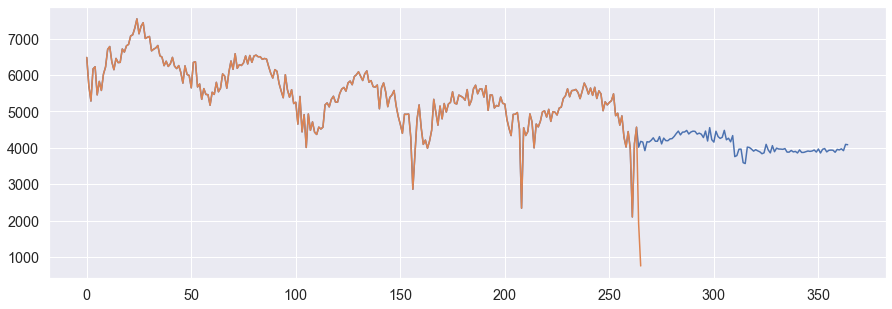

In [50]:
plt.figure(figsize=(15,5))
plt.plot(rolling_pred)
plt.plot(lim_df1)

In [51]:
pred_uc = model_fit.get_prediction(start=266, end=365, dynamic=True, full_results=True)
pred_ci = pred_uc.conf_int()
year_pred = pred_uc.predicted_mean

In [52]:
series = lim_df1['Counts']

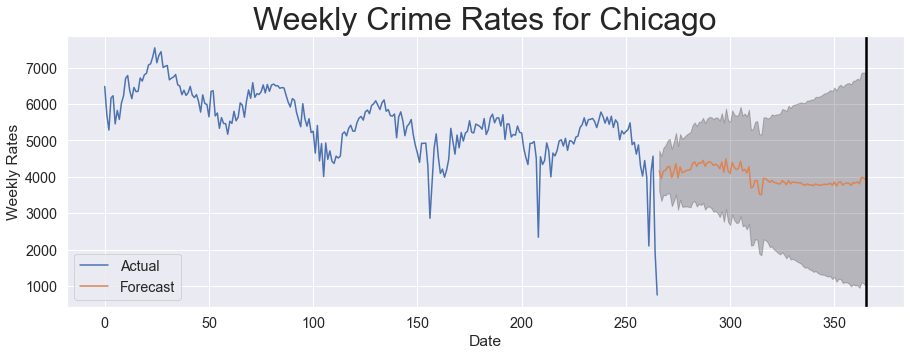

In [53]:
# pplot them out
ax = series.plot(label='Actual', figsize=(15, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Rates')
plt.title('Weekly Crime Rates for Chicago', fontsize = '32')
plt.axvline(x=365, color='black', linewidth = '2.5')
plt.legend()
plt.show()

The far furture the less certinatity, the gray area shows the uncertainaty bound for the predition. As we moving forward the upper band and lower distance increases.

# Conclusion:

Crimes over the time trend exprirment shows that the trend has a non-stationary and seasonal behavior, this in turns shows that ARIMA model is not appropriate model as it is opted to non-seasonal data. Therefore SARIMA model has been selected as it is an appropriate model that has a power of seasonality prediction. In order to be able to fit a SARIMA model to data first we need to convert the  non-stationary time-series data into a stationary data, then examine the ACF and PACF to extract right model orders (AR, I, MA).

Even though the ACF and PACF provide iformative information on how to define the model order, but it was challening to fine tune the model to forecast values with a small residuals. For this a auto_arima model was fitted to data to use its suggesstion and fit our own SARIMA model to the data.

Due to some memory and processing limitation the data was splited into two training and test sets with a proportion of %96.6 training and %3.4 testing. Next, the SARIMA model was fitted to the data to make forecast for the future 60 days. The result was not promissing as the the forecats values was more steady. To overcome this issue a rolling method was used in a way of retraing the model for each prediction that it has made previously. This slow downs the process but decrease the residuals significantly(RSME from 16389 to 4202). Having said we were able to make prediction for only 60 days ahead which the test period time is short as comapred to the traing period of 5 years. 

In order to be able to make predictions for the next two years the data was grouped by a weekly resolution which in turn is also an acceptable resolution in the big picture. Later the very same rolling method model was fitted to the weekly data and provided a %52.7 improvement in RSME(decrease from 935695 to 442047).<br><br>

<strong>Model Evaluation</strong><br>
Following a model evaluation comparision table has been created to showing RSME and P-RSME metrics all together. <br><br>



<table>
  <tr>
    <th>Model</th>
    <th>Test MEAN</th>
    <th>Test MAX</th>
    <th>RSME</th>
    <th>P-RSME</th>
    <th>RSME- Improvement</th>
    <th>Forecats MEAN</th>
    <th>Forecats MAX</th>
  </tr>
  <tr>
    <td>Simple Daily SARIMA</td>
    <th>666</th>
    <th>801</th>
    <td>16389</td>
    <td>2458</td>
    <td>N/A</td>
    <td>770</td>
    <td>779</td>
  </tr>
  <tr>
    <td>Rolling Daily SARIMA</td>
    <th>666</th>
    <th>801</th>
    <td>4202</td>
    <td>630</td>
    <td>%74.3</td>
    <td>681</td>
    <td>779</td>
  </tr>
    
  <tr>
    <td>Simple Weekly SARIMA</td>
    <th>4879</th>
    <th>5782</th>
    <td>935695</td>
    <td>19177</td>
    <td>N/A</td>
    <td>4299</td>
    <td>4786</td>
  </tr>
    
  <tr>
    <td>Rolling Weekly SARIMA</td>
    <th>4879</th>
    <th>5782</th>
    <td>442047</td>
    <td>9059</td>
    <td>%52.7</td>
    <td>4962</td>
    <td>5702</td>
  </tr>
</table>




Mean forecast values on daily resolution for the simple SARIMA model fit shows %15 distances whereas the weekly resolution shows %11.8 distance. On the other hand, the rolling model on daily resolution shows a %2 distance and on weekly resolution, this distance is %1.7.

Finally, SARIMA models show better performance on the weekly resolution as the prediction for a long period of time is not a straight line rather it shows it makes predictions learned from the historical pattern. It is also suggested to use other time series model like Prophet and comapre the results. SARIMA models are accurate however challenging on order interpreting, more study is required to understand how to interprate the ACF and PACF plots to find the right ARIMA and seasonal values.


<table>


</table>

### References:

Kaggle:
https://www.kaggle.com/code/wafadje/predict-crime-rate-in-chicago/notebook#STEP-#2:-PREDICTIONS

Time series model:
https://vitalflux.com/different-types-of-time-series-forecasting-models/

ACF and PACF:
https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf